In [1]:
import sys

In [2]:
sys.dont_write_bytecode = True

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

from GaussianMixtureModel import GaussianMixtureModel

In [4]:
np.random.seed(0)

In [5]:
N = 100000

print(f'Número de Observações: {N}')

Número de Observações: 100000


In [6]:
D = 2

print(f'Dimensão das Observações: {D}')

Dimensão das Observações: 2


In [7]:
M = 5

print(f'Número de Categorias Latentes: {M}')

Número de Categorias Latentes: 5


In [8]:
PI = np.repeat(1/M, repeats = M)

print('Distribuição das Categorias Latentes:\n')

print(PI)

Distribuição das Categorias Latentes:

[0.2 0.2 0.2 0.2 0.2]


In [9]:
ALPHA = np.random.multinomial(n = 1, pvals = PI, size = N).sum(axis = 0)

print('Número de Observações por Categoria Latente:\n')

print(ALPHA)

Número de Observações por Categoria Latente:

[19837 20253 20054 19942 19914]


In [10]:
MU = [

    [-5, -5, 0, 5, 5],
    [-5, 5, 0, -5, 5]

]

MU = np.array(MU).T

print('Médias por Categoria Latente:\n')

print(MU)

Médias por Categoria Latente:

[[-5 -5]
 [-5  5]
 [ 0  0]
 [ 5 -5]
 [ 5  5]]


In [11]:
SIGMA = [

    [

        [1, -0.75],
        [-0.75, 1]

    ], [

        [1, 0.75],
        [0.75, 1]

    ], [

        [1, 0],
        [0, 1]

    ], [

        [1, 0.75],
        [0.75, 1]

    ], [

        [1, -0.75],
        [-0.75, 1]

    ]

]

SIGMA = np.array(SIGMA)

print('Covariâncias por Categoria Latente:\n')

print(SIGMA)

Covariâncias por Categoria Latente:

[[[ 1.   -0.75]
  [-0.75  1.  ]]

 [[ 1.    0.75]
  [ 0.75  1.  ]]

 [[ 1.    0.  ]
  [ 0.    1.  ]]

 [[ 1.    0.75]
  [ 0.75  1.  ]]

 [[ 1.   -0.75]
  [-0.75  1.  ]]]


In [12]:
X, Z, = [], []

for m in range(M):

    X.append(

        np.random.multivariate_normal(

            mean = MU[m], cov = SIGMA[m],

            size = ALPHA[m]

        )

    )

    Z.append(

        np.repeat(

            m,

            repeats = ALPHA[m]

        )

    )

X, Z, = np.vstack(X), np.hstack(Z)

X, Z = shuffle(X, Z)

In [13]:
print('Observações:\n')

print(X)

Observações:

[[ 4.93826566  4.63692346]
 [ 6.73993731 -3.4886457 ]
 [-5.07301256  4.25189746]
 ...
 [ 3.09498405 -6.5881324 ]
 [-5.39349065  4.15371202]
 [ 0.99307498  1.06365695]]


In [14]:
print('Categorias Latentes:\n')

print(Z)

Categorias Latentes:

[4 3 1 ... 3 1 2]


In [15]:
DATA = pd.DataFrame(X, columns = ['Latitude', 'Longitude'])

DATA['Categoria Latente'] = Z

DATA.head()

,Latitude,Longitude,Categoria Latente
0,4.938266,4.636923,4
1,6.739937,-3.488646,3
2,-5.073013,4.251897,1
3,-3.980797,7.234552,1
4,6.696085,-4.357505,3


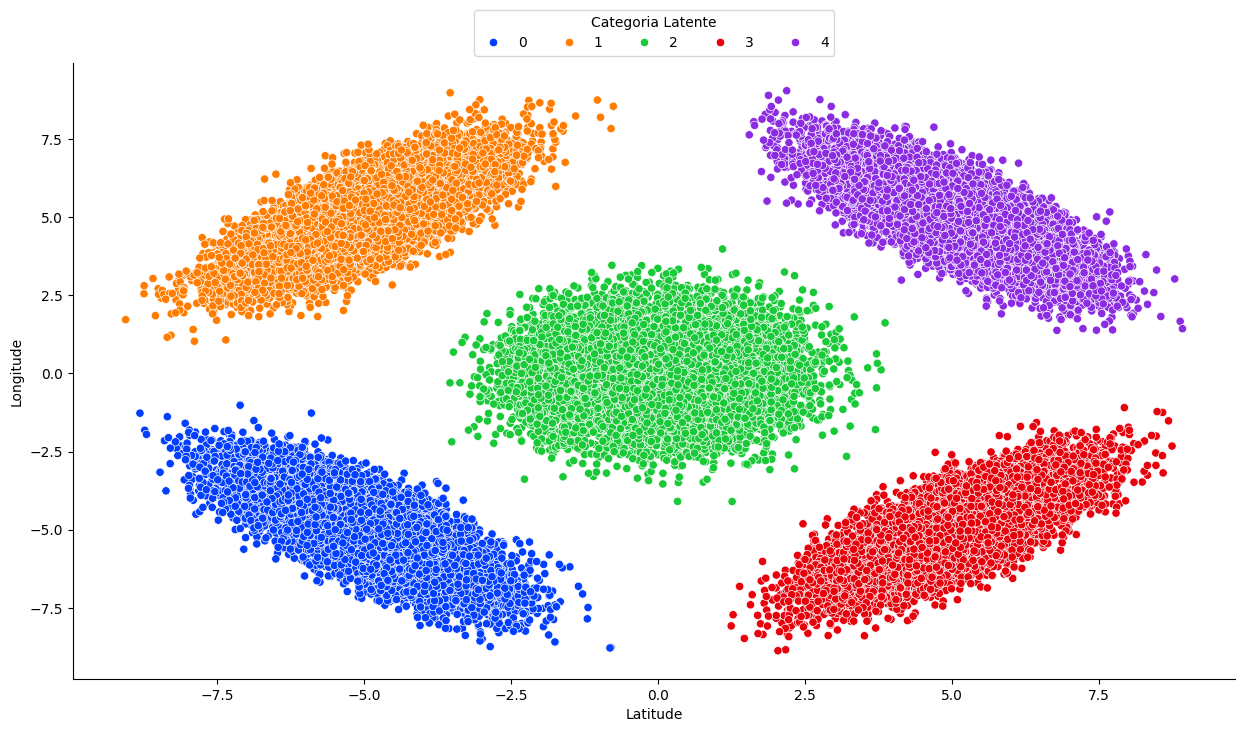

In [16]:
plt.figure(figsize = (15, 8))

GRAPHIC = sns.scatterplot(

    data = DATA, x = 'Latitude', y = 'Longitude',

    hue = 'Categoria Latente', palette = 'bright'

)

GRAPHIC.spines['right'].set_visible(False)

GRAPHIC.spines['top'].set_visible(False)

sns.move_legend(

    GRAPHIC, 'lower center',

    bbox_to_anchor = (0.5, 1), ncol = 5
    
)

plt.show()

In [17]:
GMM = GaussianMixtureModel(X = X, M = M)

GMM.update_model()

In [18]:
print('Distribuição Estimada das Categorias Latentes:\n')

print(GMM.pi)

Distribuição Estimada das Categorias Latentes:

[0.20054017 0.19836994 0.19941999 0.20252995 0.19913995]


In [19]:
print('Médias Estimadas por Categoria Latente:\n')

print(GMM.mu)

Médias Estimadas por Categoria Latente:

[[ 2.09552818e-04  3.34982495e-04]
 [-5.00428138e+00 -4.99832963e+00]
 [ 4.98759123e+00 -5.00872806e+00]
 [-4.99587194e+00  5.00727417e+00]
 [ 5.00741350e+00  5.00000096e+00]]


In [20]:
print('Covariâncias Estimadas por Categoria Latente:\n')

print(GMM.Sigma)

Covariâncias Estimadas por Categoria Latente:

[[[ 1.00260176  0.00701723]
  [ 0.00701723  1.01633733]]

 [[ 1.02112934 -0.76631848]
  [-0.76631848  1.01615793]]

 [[ 0.99838244  0.73984148]
  [ 0.73984148  0.98779737]]

 [[ 0.9991938   0.74365648]
  [ 0.74365648  0.9959587 ]]

 [[ 1.00664671 -0.75563639]
  [-0.75563639  1.00930181]]]
